**Installing Libraries**

In [4]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
import re
import unicodedata
import seaborn as sns
import matplotlib.pyplot as plt

**Importing Data**

In [6]:
df = pd.read_csv("/content/F2_Claim_Check_Worthiness_train.csv")
df.head()

,tweet,label,id
0,"India's gift of 100,000 COVID-19 vaccines arri...",0,0
1,As part of the ongoing nationwide vaccination ...,0,1
2,"Pleased to receive 50,000 doses of Covid-19 va...",0,2
3,Four former presidents have banded together fo...,0,3
4,WSJ: All three of Russia's main intelligence s...,1,4


In [7]:
test = pd.read_csv("/content/F2_Claim_Check_Worthiness_test.csv")
test.head()

,tweet,id
0,Native American communities have been hit hard...,0
1,ALERT: CVS Pharmacy is now offering COVID-19 v...,1
2,#COVID19 vaccines are an important tool to hel...,2
3,Pfizer reports that IRL the vaccine is 97% eff...,3
4,Vaccines are complex medicines. Europeans can ...,4


In [8]:
df['label'].value_counts(normalize = True)

0    0.78935
1    0.21065
Name: label, dtype: float64

**Preprocessing and Visualization**

In [9]:
def clean_text(text):
  text = re.sub('\S*@\S*\s?', '', text)
  text = re.sub('\s+', ' ', text) 
  text = re.sub("\'", '', text)
  text = re.sub('[^a-zA-Z]', ' ', text)
  text = re.sub('\s+[a-zA-Z]\s+^I', ' ', text)
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  text = re.sub(r'\s+', ' ', text)
  text = re.sub(r'^\s*|\s\s*', ' ', text).strip()
  text = text.lower()
  return text

In [10]:
from wordcloud import WordCloud
def word_cld(dataframe):
  tweets=dataframe['tweet']
  tweets_ls = [text for text in tweets]
  real_all_words = ' '.join(tweets)
  wordcloud_real = WordCloud(background_color='white',
      width= 800, height= 500,
      max_font_size = 180,
      collocations = False).generate(real_all_words)

  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud_real, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [11]:
positive= df[ df['label'] == 1]
negative= df[ df['label'] == 0]

For Both Classes:
 
 


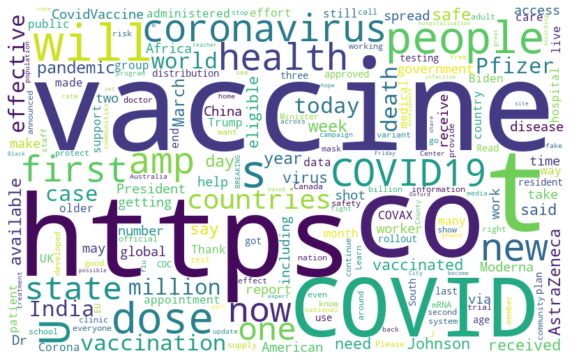

 
 
For Positive Classes:
 
 


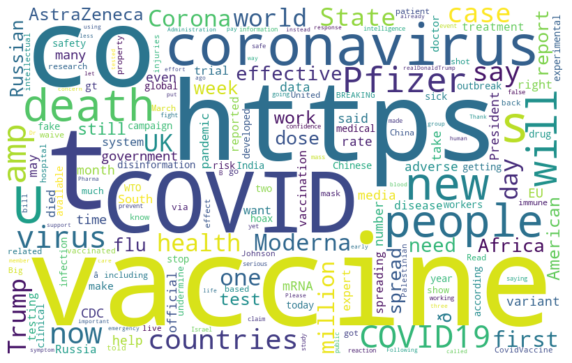

 
 
For Negative Classes:
 
 


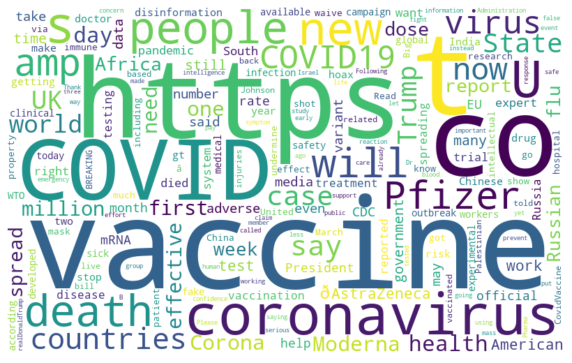

In [12]:
print("For Both Classes:")
print(" ")
print(" ")
word_cld(df)
print(" ")
print(" ")
print("For Positive Classes:")
print(" ")
print(" ")
word_cld(positive)
print(" ")
print(" ")
print("For Negative Classes:")
print(" ")
print(" ")
word_cld(positive)
print(" ")
print(" ")

In [13]:
df['tweet'] = df['tweet'].apply(lambda x : clean_text(x)).values.tolist()
test['tweet'] = test['tweet'].apply(lambda x : clean_text(x)).values.tolist()

In [14]:
positive= df[ df['label'] == 1]
negative= df[ df['label'] == 0]

For Both Classes:
 
 


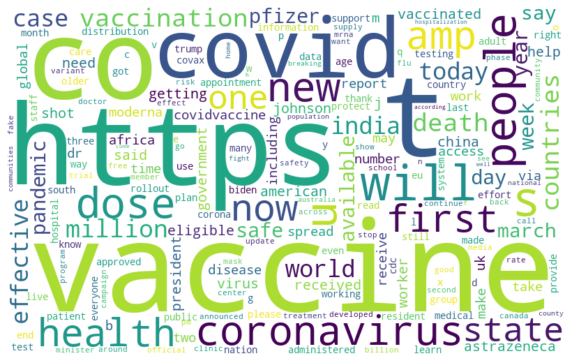

 
 
For Positive Classes:
 
 


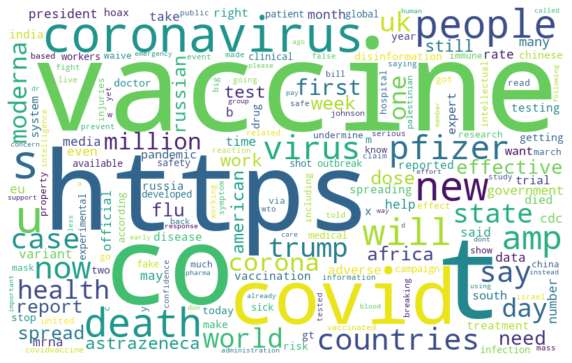

 
 
For Negative Classes:
 
 


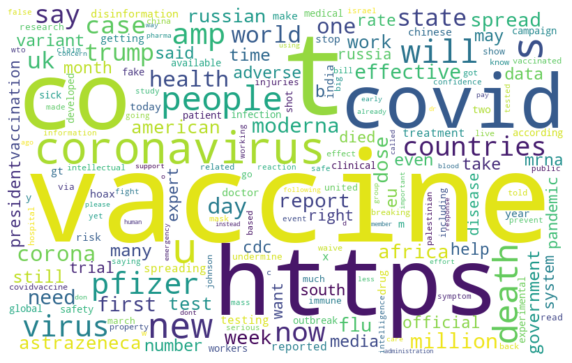

In [15]:
print("For Both Classes:")
print(" ")
print(" ")
word_cld(df)
print(" ")
print(" ")
print("For Positive Classes:")
print(" ")
print(" ")
word_cld(positive)
print(" ")
print(" ")
print("For Negative Classes:")
print(" ")
print(" ")
word_cld(positive)
print(" ")
print(" ")

In [16]:
tweets = [text for text in df.tweet]

max_len = 0
tweets_len = []
for tweet in tweets:
    tweets_len.append(len(tweet.split()))
    max_len = max(len(tweet.split()), max_len)

print('Number of tweets:', len(tweets))
print('Max length of the tweet:', max_len)
print('Mean length of the tweet:', np.mean(tweets_len))

Number of tweets: 2122
Max length of the tweet: 58
Mean length of the tweet: 38.13336475023563


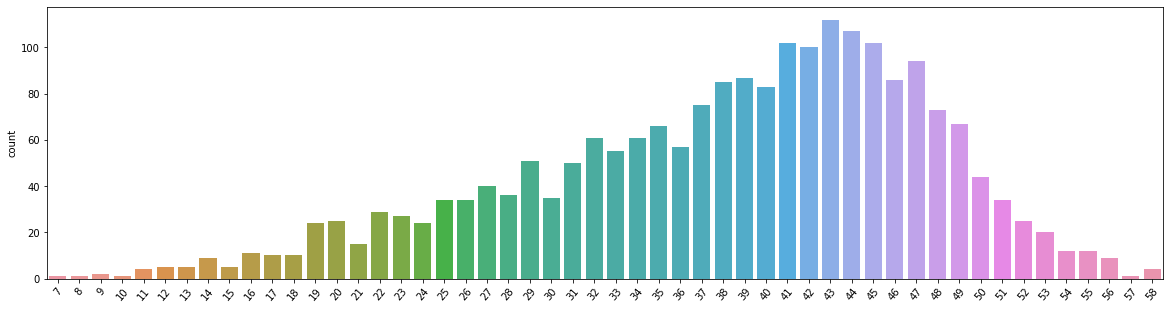

In [17]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=tweets_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [18]:
tweets = [text for text in df.tweet]

max_len = 0
tweets_len = []
for tweet in tweets:
    tweets_len.append(len(tweet.split()))
print('Mean length of the texts:', np.mean(tweets_len))

Mean length of the texts: 38.13336475023563


In [19]:
df

,tweet,label,id
0,indias gift of covid vaccines arrived barbados...,0,0
1,as part of the ongoing nationwide vaccination ...,0,1
2,pleased to receive doses of covid vaccines fro...,0,2
3,four former presidents have banded together fo...,0,3
4,wsj all three of russias main intelligence ser...,1,4
...,...,...,...
2117,some pearl of wisdom by your fuckeer bill gate...,1,2117
2118,top infectious disease expert dr anthony fauci...,1,2118
2119,everyone is looking at bill gates for the coro...,1,2119
2120,the president s first instinct in response to ...,0,2120


In [20]:
from sklearn.utils import shuffle
df = df.iloc[:,:]
df = shuffle(df).reset_index(drop=True)
df.head()

,tweet,label,id
0,before the corona virus reached south africa t...,0,1930
1,re upping this latest entry in a month long th...,0,85
2,photos health professionals and those with hea...,0,233
3,some pearl of wisdom by your fuckeer bill gate...,1,2117
4,firs proud to declare support for vaccinequity...,0,1370


**Split into Train and Validation**

In [21]:
train_df = df.sample(frac = 0.8)
val_df = df.drop(train_df.index)

In [22]:
train_df

,tweet,label,id
1685,qld doctor exposed to covid did all the right ...,0,938
879,these aforementioned hospitals have no vaccine...,0,1609
1712,together with we re partnering to increase acc...,0,1009
1627,thank you to for hosting our first covid vacci...,0,1579
620,plans to vaccinate of the population by the en...,0,716
...,...,...,...
1397,both the pfizer biontech and the oxford astraz...,0,124
1013,california has yet again switched up its vacci...,0,933
327,just saw on nbc national news that state of so...,1,1325
1811,websites linked to russian intelligence servic...,1,1762


In [23]:
train_df = df.sample(frac = 0.8)
val_df = df.drop(train_df.index)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (1698, 3)
valset size: (424, 3)
testset size: (195, 2)


In [24]:
train_df.to_csv('train.csv', sep='\t', index=False)
val_df.to_csv('val.csv', sep='\t', index=False)
test_df.to_csv('test.csv', sep='\t', index=False)

In [25]:
df = pd.concat([train_df, val_df])
df

,tweet,label,id
0,more here s how covid vaccines will be allocat...,0,498
1,covid vaccines may impact covidtesting but not...,0,594
2,select pharmacies in toronto are booking appoi...,0,369
3,a new survey found high levels of vaccine hesi...,0,1528
4,live updates coronavirus ni fourth wave of cov...,1,1740
...,...,...,...
419,i wanted detailed covid data but had a hard ti...,1,1961
420,at the trips council south africa underscored ...,0,990
421,operation warp speed leaders waited more than ...,1,983
422,chairperson of the parliamentary portfolio com...,0,1415


In [26]:
import nltk
nltk.download("stopwords")
# Adding to Stopwords from wordcloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['https', 't', 'u', 's'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
def preprocess(text): #remove stop words and words of length <2
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)          
    return result

In [28]:
import gensim

df['clean'] = df['tweet'].apply(preprocess)
test['clean']=test['tweet'].apply(preprocess)

In [29]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

9149

In [30]:
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer


tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['tweet'])
train_sequences = tokenizer.texts_to_sequences(train_df['tweet'])
val_sequences = tokenizer.texts_to_sequences(val_df['tweet'])
test_sequences = tokenizer.texts_to_sequences(test_df['tweet'])

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 55, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 55, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 55, padding = 'post', truncating = 'post')

In [32]:
padded_train.shape

(1698, 55)

## LSTM

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

## Creating model Using LSTM
embedding_vector_features=128
model=Sequential()
model.Pooling(base_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=768, activation_function=nn.Tanh())

model.add(Embedding(total_words,embedding_vector_features,input_length=55))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 55, 128)           1171072   
                                                                 
 dropout (Dropout)           (None, 55, 128)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,262,773
Trainable params: 1,262,773
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
y_train = np.asarray(train_df['label'])
y_val = np.asarray(val_df['label'])

# Training the model
model.fit(padded_train, y_train, batch_size = 16, validation_data=(padded_val, y_val), epochs = 5)

Epoch 1/5
107/107 [==============================] - 13s 28ms/step - loss: 0.5403 - accuracy: 0.7786 - val_loss: 0.5006 - val_accuracy: 0.8019
Epoch 2/5
107/107 [==============================] - 2s 14ms/step - loss: 0.4761 - accuracy: 0.7850 - val_loss: 0.4705 - val_accuracy: 0.7854
Epoch 3/5
107/107 [==============================] - 2s 14ms/step - loss: 0.3073 - accuracy: 0.8869 - val_loss: 0.5522 - val_accuracy: 0.7642
Epoch 4/5
107/107 [==============================] - 1s 13ms/step - loss: 0.1638 - accuracy: 0.9529 - val_loss: 0.6973 - val_accuracy: 0.7948
Epoch 5/5
107/107 [==============================] - 1s 14ms/step - loss: 0.1523 - accuracy: 0.9476 - val_loss: 0.8925 - val_accuracy: 0.7807


In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

predict_x=model.predict(padded_val) 
prediction=np.argmax(predict_x,axis=1)
accuracy = f1_score(list(y_val), prediction, average='micro')

print("For Validation:")
print("LSTM Model F1 score : ", accuracy)

14/14 [==============================] - 1s 6ms/step
For Validation:
LSTM Model F1 score :  0.8018867924528302


For Test

In [36]:
predict_x=model.predict(padded_test) 
prediction=np.argmax(predict_x,axis=1)
data = {'label': prediction,
        'id': test["id"]}

df_out = pd.DataFrame(data)
df_out.set_index('label', inplace=True)
df_out.to_csv('lstm.csv')

7/7 [==============================] - 0s 6ms/step


# Bi-LSTM

In [37]:
#Bi-LSTM
embedding_vector_features=128
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=55))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 55, 128)           1171072   
                                                                 
 dropout_2 (Dropout)         (None, 55, 128)           0         
                                                                 
 bidirectional (Bidirectiona  (None, 200)              183200    
 l)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1,354,473
Trainable params: 1,354,473
Non-trainable params: 0
____________________________________________

In [38]:
y_train = np.asarray(train_df['label'])
y_val = np.asarray(val_df['label'])

# Training the model
model.fit(padded_train, y_train, batch_size = 16, validation_data=(padded_val, y_val), epochs = 5)

Epoch 1/5
107/107 [==============================] - 9s 30ms/step - loss: 0.5167 - accuracy: 0.7797 - val_loss: 0.4431 - val_accuracy: 0.8019
Epoch 2/5
107/107 [==============================] - 1s 12ms/step - loss: 0.3423 - accuracy: 0.8616 - val_loss: 0.4472 - val_accuracy: 0.7736
Epoch 3/5
107/107 [==============================] - 1s 11ms/step - loss: 0.1478 - accuracy: 0.9446 - val_loss: 0.4791 - val_accuracy: 0.7972
Epoch 4/5
107/107 [==============================] - 1s 12ms/step - loss: 0.0733 - accuracy: 0.9823 - val_loss: 0.6262 - val_accuracy: 0.7877
Epoch 5/5
107/107 [==============================] - 1s 11ms/step - loss: 0.0214 - accuracy: 0.9965 - val_loss: 0.7177 - val_accuracy: 0.8231


In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

predict_x=model.predict(padded_val) 
prediction=np.argmax(predict_x,axis=1)
f1 = f1_score(list(y_val), prediction, average='micro')

print("For Validation:")
print("Bi-LSTM Model F1 score : ", f1)

14/14 [==============================] - 1s 4ms/step
For Validation:
Bi-LSTM Model F1 score :  0.8018867924528302


In [40]:
predict_x=model.predict(padded_test) 
prediction=np.argmax(predict_x,axis=1)
data = {'label': prediction,
        'id': test["id"]}

df_out = pd.DataFrame(data)
df_out.set_index('label', inplace=True)
df_out.to_csv('bilstm.csv')

7/7 [==============================] - 0s 4ms/step


## CNN Model

In [41]:
embedding_vector_features=128
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=55))

model.add(Dropout(0.3))

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 55, 128)           1171072   
                                                                 
 dropout_4 (Dropout)         (None, 55, 128)           0         
                                                                 
 conv1d (Conv1D)             (None, 51, 32)            20512     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 25, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 32)            5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 32)           0         
 1D)                                                  

In [42]:
y_train = np.asarray(train_df['label'])
y_val = np.asarray(val_df['label'])

# Training the model
model.fit(padded_train, y_train, batch_size = 16, validation_data=(padded_val, y_val), epochs = 5)

Epoch 1/5
107/107 [==============================] - 10s 19ms/step - loss: 0.5202 - accuracy: 0.7827 - val_loss: 0.4556 - val_accuracy: 0.8019
Epoch 2/5
107/107 [==============================] - 1s 9ms/step - loss: 0.3327 - accuracy: 0.8457 - val_loss: 0.4615 - val_accuracy: 0.7854
Epoch 3/5
107/107 [==============================] - 1s 10ms/step - loss: 0.0919 - accuracy: 0.9664 - val_loss: 0.6171 - val_accuracy: 0.8042
Epoch 4/5
107/107 [==============================] - 1s 10ms/step - loss: 0.0251 - accuracy: 0.9906 - val_loss: 0.8922 - val_accuracy: 0.7877
Epoch 5/5
107/107 [==============================] - 1s 10ms/step - loss: 0.0075 - accuracy: 0.9971 - val_loss: 1.2697 - val_accuracy: 0.8042


In [43]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

predict_x=model.predict(padded_val) 
prediction=np.argmax(predict_x,axis=1)
f1 = f1_score(list(y_val), prediction, average='micro')

print("For Validation:")
print("CNN Model F1 score : ", f1)

14/14 [==============================] - 1s 3ms/step
For Validation:
CNN Model F1 score :  0.8018867924528302


In [44]:
predict_x=model.predict(padded_test) 
prediction=np.argmax(predict_x,axis=1)
data = {'label': prediction,
        'id': test["id"]}

df_out = pd.DataFrame(data)
df_out.set_index('label', inplace=True)
df_out.to_csv('cnn.csv')

7/7 [==============================] - 0s 8ms/step
